In [16]:
# lib's
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.linalg as la
from scipy.fft import fft, fftfreq
from scipy import signal

sig :  [2.98 2.91 2.84 ... 0.14 0.15 0.16]


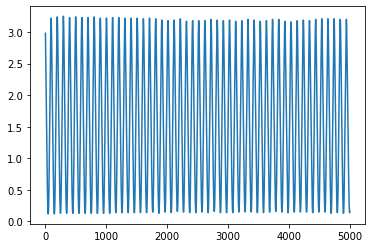

In [17]:
# load data points and plot
sig = np.loadtxt('Healthy_Motor_50Hz_4thApr2022.txt')
print('sig : ',sig)
plt.plot(sig)
plt.show()

In [52]:
# 5000 samples

Fs = 5000
Ts = 1 / Fs
print("Ts : ",Ts)
Fmax = Fs / 2
print("Fmax : ",Fmax)

# Initial values of wo and phio
wo= 2 * np.pi
print("wo : ",wo)
phio = np.pi / 7
print("phio : ",phio)

# Initial values of the covariance matrix
P = 10 * np.eye(3, dtype=int)
print('P : \n', P)
print('P.shape : ',P.shape)


Ts :  0.0002
Fmax :  2500.0
wo :  6.283185307179586
phio :  0.4487989505128276
P : 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
P.shape :  (3, 3)


x : 
 [1.99999842 0.90096887 0.90151339]
x : 
 [[1.99999842]
 [0.90096887]
 [0.90151339]]


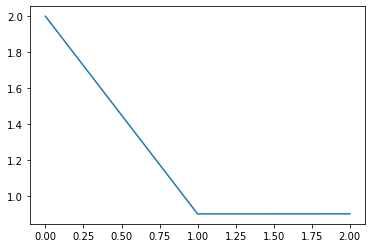

In [53]:
# 
Ao=1.0

x = np.array([2 * np.cos(wo * Ts), Ao * np.cos(phio), Ao * np.cos(phio - wo * Ts)]).T
print('x : \n', x)
x = np.expand_dims(x, axis=1)
print('x : \n', x)

plt.plot(x)
plt.show()

mean of sig :  1.556186
standard_deviation of sig :  1.0444987857360104


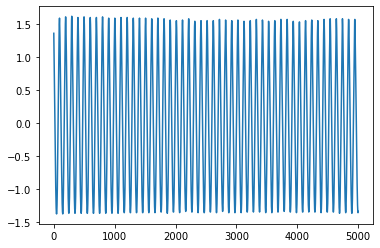

In [54]:
def standard_scaler(x, mean, standard_deviation):
    z = (x - mean) / standard_deviation
    return z 

mean = np.mean(sig)
standard_deviation = np.std(sig)

print('mean of sig : ', mean)
print('standard_deviation of sig : ', standard_deviation)

y = [standard_scaler(i, mean, standard_deviation) for i in sig]
# print('y : ', y)
plt.plot(y)

In [56]:
# 5000 samples are there

yhat = np.zeros(sig.size)
wehat = np.zeros(sig.size)

print('yhat : ', yhat, 'length is : ', len(yhat))
print('wehat : ', wehat, 'length is : ', len(wehat))


for k in range(1,sig.size-2) :
    print('Iteration No. : ', k)
    '''
    given x is :
    [[1.99999842]
    [0.90096887]
    [0.90151339]]
    '''
    
#     print('x : \n', x)
#     print('x[1][0] : ',x[1][0])
#     print('x[0][0] : ',x[0][0])
    
    G=np.array([[x[1][0], x[0][0], -1]])
    print('G : ', G, end=', ')
    print('G.shape : ', G.shape)
    
    K1 = P * G.T * (la.inv(G * P * G.T + 1) * 1)
    
    
    print('K1 : \n', K1)

    K = np.diag(K1)
    print('K : \n', K)
    K = np.expand_dims(K, axis=1)
    print('K : \n', K)

    print('K.shape : ', K.shape)
    
    yhat[k] = x[0][0] * x[1][0] - x[2][0]
    print('yhat[k] : ', yhat[k])
    print('y[k] : ', y[k])
    print("( y[k] - yhat[k] ) = ", y[k]-yhat[k])
    
    
    c = K * ( y[k] - yhat[k] )
    print("c : \n", c, "c.shape : ", c.shape)
    print("x : \n", x, "x.shape : ", x.shape)

    x = x + c
    print("x = x + c : \n", x, "x.shape : ", x.shape)
    
    
    
    P = P - K * G * P
    print('P : ', P)
    F=np.array([[1, 0, 0], [x[1][0], x[0][0], -1], [0, 1, 0]])
    print('F : ', F, 'F.shape : ', F.shape)

    
#     P=F*P*F.T
#     x=np.array([x[1], [x[0][0]*x[1][0]-x[2][0]], x[1]])
#     print(x)

#     if (x[0][0] > 2.).all():
#         x[0][0]=2
#     elif (x[0][0] < 0).all():
#         x[0][0]=0
        
#     wehat[k]=np.arccos(x[0][0]/2)/(Ts)
    
    print('\n\n\n')
    
    
# plt.plot(wehat.T/(2*np.pi))
# plt.show()

yhat :  [0. 0. 0. ... 0. 0. 0.] length is :  5000
wehat :  [0. 0. 0. ... 0. 0. 0.] length is :  5000
Iteration No. :  1
G :  [[-0.01571117 -0.03431877 -1.        ]], G.shape :  (1, 3)


LinAlgError: singular matrix